In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
ROOT_DIR = 'M:\My Files\Mrityunjay Jha\Programming\Competition\Credit Risk Prediction - Univ.AI'
INPUT = os.path.join( ROOT_DIR, 'input' )
CSV_PATH = os.path.join( INPUT, 'csvs' )
TRAIN_CSV_PATH = os.path.join(CSV_PATH, 'train.csv')
TEST_CSV_PATH = os.path.join(CSV_PATH, 'test.csv')

In [12]:
train = pd.read_csv( TRAIN_CSV_PATH )
test = pd.read_csv( TEST_CSV_PATH )

In [16]:
train['state'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [8]:
test.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [9]:
train.isnull().sum()

Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

In [10]:
test.isnull().sum()

id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
dtype: int64

In [11]:
train.dtypes

Id                      int64
income                  int64
age                     int64
experience              int64
married                object
house_ownership        object
car_ownership          object
profession             object
city                   object
state                  object
current_job_years       int64
current_house_years     int64
risk_flag               int64
dtype: object

In [12]:
test.dtypes

id                      int64
income                  int64
age                     int64
experience              int64
married                object
house_ownership        object
car_ownership          object
profession             object
city                   object
state                  object
current_job_years       int64
current_house_years     int64
dtype: object

## Looking Into Object Variables ##

In [18]:
train_obj = train.select_dtypes( include = ['object'] )
test_obj = test.select_dtypes( include = ['object'] )

In [19]:
train_obj.head()

,married,house_ownership,car_ownership,profession,city,state
0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh
1,single,rented,no,Software_Developer,Parbhani,Maharashtra
2,married,rented,no,Technical_writer,Alappuzha,Kerala
3,single,rented,yes,Software_Developer,Bhubaneswar,Odisha
4,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu


In [26]:
cat_cols = train.select_dtypes( include = ['object'] ).columns
train[cat_cols] = train[cat_cols].astype( "category" ).apply( lambda x : x.cat.codes )
train.dtypes

Id                     int64
income                 int64
age                    int64
experience             int64
married                 int8
house_ownership         int8
car_ownership           int8
profession              int8
city                   int16
state                   int8
current_job_years      int64
current_house_years    int64
risk_flag              int64
dtype: object

In [25]:
test_obj.head()

,married,house_ownership,car_ownership,profession,city,state
0,single,rented,no,Geologist,Malda,West Bengal
1,single,rented,no,Firefighter,Jalna,Maharashtra
2,single,rented,no,Lawyer,Thane,Maharashtra
3,married,rented,yes,Analyst,Latur,Maharashtra
4,single,rented,yes,Comedian,Berhampore,West Bengal


In [31]:
train_obj['married'].unique()

array(['single', 'married'], dtype=object)

In [32]:
train_obj['house_ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [33]:
train_obj['car_ownership'].unique()

array(['no', 'yes'], dtype=object)

In [34]:
train_obj['profession'].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [35]:
train_obj['city'].unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [36]:
train_obj['state'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [54]:
train.drop( ['Id'], axis = 1, inplace = True )

In [55]:
train.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   income               252000 non-null  int64 
 1   age                  252000 non-null  int64 
 2   experience           252000 non-null  int64 
 3   married              252000 non-null  object
 4   house_ownership      252000 non-null  object
 5   car_ownership        252000 non-null  object
 6   profession           252000 non-null  object
 7   city                 252000 non-null  object
 8   state                252000 non-null  object
 9   current_job_years    252000 non-null  int64 
 10  current_house_years  252000 non-null  int64 
 11  risk_flag            252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [62]:
train.describe()

,income,age,experience,current_job_years,current_house_years,risk_flag
count,252000.000,252000.000,252000.000,252000.000,252000.000,252000.000
mean,4997116.665,49.954,10.084,6.334,11.998,0.123
std,2878311.014,17.064,6.003,3.647,1.399,0.328
min,10310.000,21.000,0.000,0.000,10.000,0.000
25%,2503015.000,35.000,5.000,3.000,11.000,0.000
50%,5000694.500,50.000,10.000,6.000,12.000,0.000
75%,7477502.000,65.000,15.000,9.000,13.000,0.000
max,9999938.000,79.000,20.000,14.000,14.000,1.000


In [13]:
train_num = train.select_dtypes( include = ['int64'] )

<AxesSubplot:>

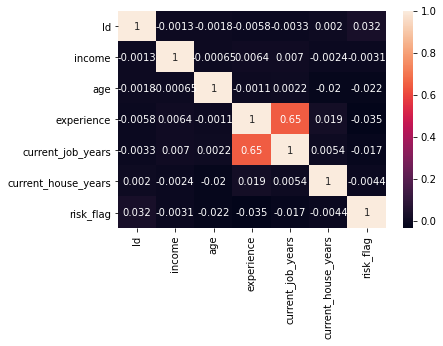

In [16]:
sns.heatmap( train_num.corr(), annot = True )

<AxesSubplot:xlabel='state', ylabel='count'>

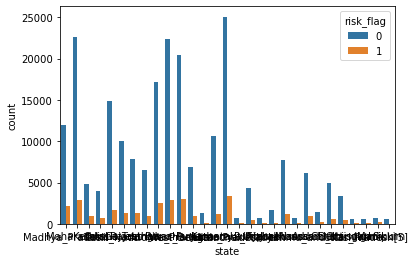

In [48]:
sns.countplot( x = 'state', hue = 'risk_flag', data = train )

In [40]:
train.groupby( by = ['state', 'risk_flag' ] ).size()

state              risk_flag
Andhra_Pradesh     0            22362
                   1             2935
Assam              0             6132
                   1              930
Bihar              0            17197
                   1             2583
Chandigarh         0              595
                   1               61
Chhattisgarh       0             3323
                   1              511
Delhi              0             4916
                   1              574
Gujarat            0            10065
                   1             1343
Haryana            0             6910
                   1              980
Himachal_Pradesh   0              722
                   1              111
Jammu_and_Kashmir  0             1497
                   1              283
Jharkhand          0             7770
                   1             1195
Karnataka          0            10666
                   1             1189
Kerala             0             4835
                   1 

In [47]:
train.groupby( ['risk_flag'] ).size()

risk_flag
0    221004
1     30996
dtype: int64

In [28]:
train = pd.read_csv( TRAIN_CSV_PATH )
train['city'] = train['city'].apply( lambda x : x.split( '[' )[0] if '[' in x else x )
train['state'] = train['state'].apply( lambda x : x.split( '[' )[0] if '[' in x else x )
print( train['city'].unique() )
risk_flag = train[['risk_flag']].copy()
train.drop( ['risk_flag','Id', 'city'], axis = 1, inplace = True )
train = pd.get_dummies( train, drop_first = True )
train = pd.concat( [train, risk_flag], axis = 1 )

['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli' 'Jalgaon'
 'Tiruppur' 'Jamnagar' 'Kota' 'Karimnagar' 'Hajipur' 'Adoni' 'Erode'
 'Kollam' 'Madurai' 'Anantapuram' 'Kamarhati' 'Bhusawal' 'Sirsa'
 'Amaravati' 'Secunderabad' 'Ahmedabad' 'Ajmer' 'Ongole' 'Miryalaguda'
 'Ambattur' 'Indore' 'Pondicherry' 'Shimoga' 'Chennai' 'Gulbarga'
 'Khammam' 'Saharanpur' 'Gopalpur' 'Amravati' 'Udupi' 'Howrah'
 'Aurangabad' 'Hospet' 'Shimla' 'Khandwa' 'Bidhannagar' 'Bellary'
 'Danapur' 'Purnia' 'Bijapur' 'Patiala' 'Malda' 'Sagar' 'Durgapur'
 'Junagadh' 'Singrauli' 'Agartala' 'Thanjavur' 'Hindupur' 'Naihati'
 'North_Dumdum' 'Panchkula' 'Anantapur' 'Serampore' 'Bathinda' 'Nadiad'
 'Kanpur' 'Haridwar' 'Berhampur' 'Jamshedpur' 'Hyderabad' 'Bidar'
 'Kottayam' 'Solapur' 'Suryapet' 'Aizawl' 'Asansol' 'Deoghar' 'Eluru'
 'Ulhasnagar' 'Aligarh' 'South_Dumdum' 'Berhampore' 'Gandhinagar'
 'Sonipat' 'Muzaffarpur' 'Raichur' 'Rajpur_Sonarpur' 'Ambarnath' 'Katihar'
 'Kozhikode' 'Vellore' 'Malegaon' 'Kochi' '

In [29]:
train.head()

,income,age,experience,current_job_years,current_house_years,married_single,house_ownership_owned,house_ownership_rented,car_ownership_yes,profession_Analyst,...,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil_Nadu,state_Telangana,state_Tripura,state_Uttar_Pradesh,state_Uttarakhand,state_West_Bengal,risk_flag
0,1303835,23,3,3,13,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,9,13,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3991815,66,4,4,10,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6256451,41,2,2,12,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,5768871,47,11,3,14,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   28000 non-null  int64 
 1   income               28000 non-null  int64 
 2   age                  28000 non-null  int64 
 3   experience           28000 non-null  int64 
 4   married              28000 non-null  object
 5   house_ownership      28000 non-null  object
 6   car_ownership        28000 non-null  object
 7   profession           28000 non-null  object
 8   city                 28000 non-null  object
 9   state                28000 non-null  object
 10  current_job_years    28000 non-null  int64 
 11  current_house_years  28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


In [60]:
normalized_df=(train-train.min())/(train.max()-train.min())

In [62]:
normalized_df.describe()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag,married_single,house_ownership_owned,house_ownership_rented,...,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil_Nadu,state_Telangana,state_Tripura,state_Uttar_Pradesh,state_Uttar_Pradesh[5],state_Uttarakhand,state_West_Bengal
count,252000.000,252000.000,252000.000,252000.000,252000.000,252000.000,252000.000,252000.000,252000.000,252000.000,...,252000.000,252000.000,252000.000,252000.000,252000.000,252000.000,252000.000,252000.000,252000.000,252000.000
mean,0.500,0.499,0.499,0.504,0.452,0.499,0.123,0.898,0.051,0.920,...,0.019,0.036,0.002,0.066,0.030,0.003,0.113,0.003,0.007,0.093
std,0.289,0.288,0.294,0.300,0.261,0.350,0.328,0.303,0.221,0.271,...,0.136,0.187,0.049,0.248,0.170,0.057,0.316,0.054,0.086,0.291
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.250,0.250,0.241,0.250,0.214,0.250,0.000,1.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.500,0.500,0.500,0.500,0.429,0.500,0.000,1.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.750,0.747,0.759,0.750,0.643,0.750,0.000,1.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [70]:
def preprocess( df ):
    df.drop( ['Id'], axis = 1, inplace = True )
    df = ( ( df - df.min() ) / ( df.max() - df.min() ) )

In [76]:
train

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [74]:
train = preprocess( train )

KeyError: "['Id'] not found in axis"

In [73]:
train

,income,age,experience,current_job_years,current_house_years,risk_flag,married_single,house_ownership_owned,house_ownership_rented,car_ownership_yes,...,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil_Nadu,state_Telangana,state_Tripura,state_Uttar_Pradesh,state_Uttar_Pradesh[5],state_Uttarakhand,state_West_Bengal
0,1303835,23,3,3,13,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,9,13,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3991815,66,4,4,10,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,6256451,41,2,2,12,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5768871,47,11,3,14,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,6,11,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
251996,2843572,26,10,6,11,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
251997,4522448,46,7,7,12,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
251998,6507128,45,0,0,10,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
